# LightGBM

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### 데이터 로딩 ###
dataset = pd.read_csv('/content/drive/MyDrive/빅데이터 팀플/dementia_analytics/data_processing/dataset_05/dataset_with_label_fill_user_mean.csv')
data_output = dataset[['DIAG_NM']]
# data_input에서 score 가 들어가는 column 등 필요 없는 column 제거
data_input = dataset.drop(['DIAG_NM', 'ID', 'date'], axis=1)
columns_to_drop = [col for col in data_input.columns if 'score' in col]
data_input = data_input[['sleep_breath_average', 'sleep_hr_average', 'sleep_hr_lowest', 'sleep_deep', 'sleep_rem', 'activity_cal_total', 'sleep_awake', 'activity_steps', 'activity_total', 'sleep_duration', 'activity_daily_movement']]
# KeyError: "['sleep_bedtime_end', 'sleep_bedtime_start', 'sleep_hr_5min'] not in index"
#'activity_cal_active', 
#  'activity_met_min_inactive', 'activity_high', 'sleep_efficiency', 'activity_rest', 'activity_met_min_low', 'activity_inactive', 'activity_medium', 'activity_low', 'activity_met_min_medium', 'activity_met_min_high'

In [15]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_output, test_output = train_test_split(data_input, data_output, test_size=0.2, shuffle=True, stratify=data_output, random_state=42)

In [16]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
scaler_fit = scaler.fit(train_input)
train_input = scaler_fit.transform(train_input)
test_input = scaler_fit.transform(test_input)

In [17]:
### 레이블 인코딩 ### 

# 트리 기반 알고리즘에서는 숫자의 크기에 따른 중요도 차이가 없어 레이블 인코딩 OK
# 선형적 특징을 가지는 알고리즘들은 one hot encoding 통해 해결해야 함

from sklearn.preprocessing import LabelEncoder

# 라벨인코더 선언 및 Fitting
# CN : 0, Dem : 1, MCI : 2
items = ['CN', 'Dem', 'MCI']
encoder = LabelEncoder()
encoder = encoder.fit(items)

# train
train_output['DIAG_NM'] = encoder.transform(train_output['DIAG_NM'])
# display(encoder.classes_)
# display(encoder.inverse_transform(train_output['DIAG_NM']))

# test
test_output['DIAG_NM'] = encoder.transform(test_output['DIAG_NM'])

In [ ]:
### Light GBM ###
from lightgbm import LGBMClassifier

test_input = scaler_fit.transform(test_input)

LGBM = LGBMClassifier()
evals = [(test_input, test_output)]
LGBM.fit(train_input, train_output, early_stopping_rounds=100, eval_metric='logloss', eval_set=evals, verbose=True)
test_pred = LGBM.predict(test_input)
train_pred = LGBM.predict(train_input)
# pred_proba = LGBM.predict_proba(test_input)[:1]

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a

[1]	valid_0's multi_logloss: 0.799694
[2]	valid_0's multi_logloss: 0.770445
[3]	valid_0's multi_logloss: 0.747715
[4]	valid_0's multi_logloss: 0.727776
[5]	valid_0's multi_logloss: 0.710803
[6]	valid_0's multi_logloss: 0.69435
[7]	valid_0's multi_logloss: 0.67972
[8]	valid_0's multi_logloss: 0.667242
[9]	valid_0's multi_logloss: 0.656066
[10]	valid_0's multi_logloss: 0.645608
[11]	valid_0's multi_logloss: 0.636569
[12]	valid_0's multi_logloss: 0.628278
[13]	valid_0's multi_logloss: 0.620379
[14]	valid_0's multi_logloss: 0.61281
[15]	valid_0's multi_logloss: 0.606037
[16]	valid_0's multi_logloss: 0.598316
[17]	valid_0's multi_logloss: 0.593211
[18]	valid_0's multi_logloss: 0.585605
[19]	valid_0's multi_logloss: 0.579275
[20]	valid_0's multi_logloss: 0.574746
[21]	valid_0's multi_logloss: 0.569371
[22]	valid_0's multi_logloss: 0.564516
[23]	valid_0's multi_logloss: 0.560714
[24]	valid_0's multi_logloss: 0.556618
[25]	valid_0's multi_logloss: 0.552086
[26]	valid_0's multi_logloss: 0.54831

In [ ]:
from sklearn.metrics import accuracy_score

print(accuracy_score(train_output, train_pred))
print(accuracy_score(test_output, test_pred))

0.9276777875329236
0.7866549604916594


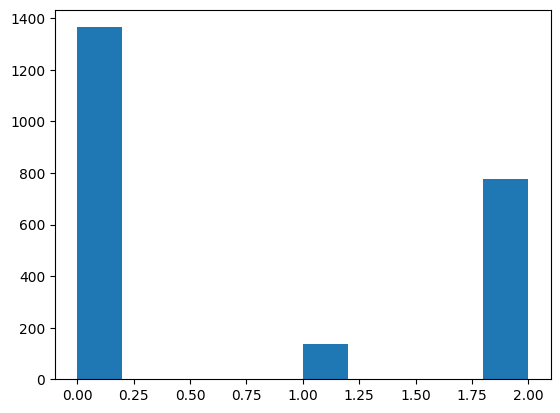

In [ ]:
plt.hist(test_output)
plt.show()

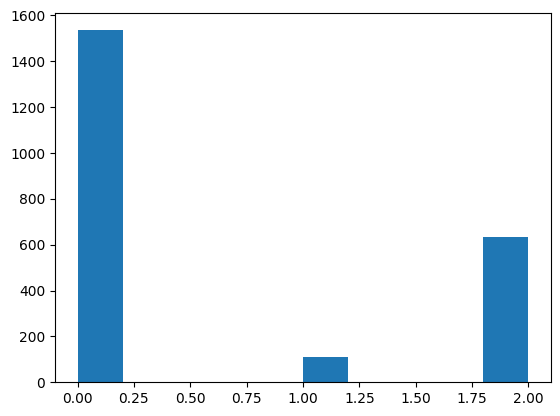

In [ ]:
plt.hist(test_pred)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

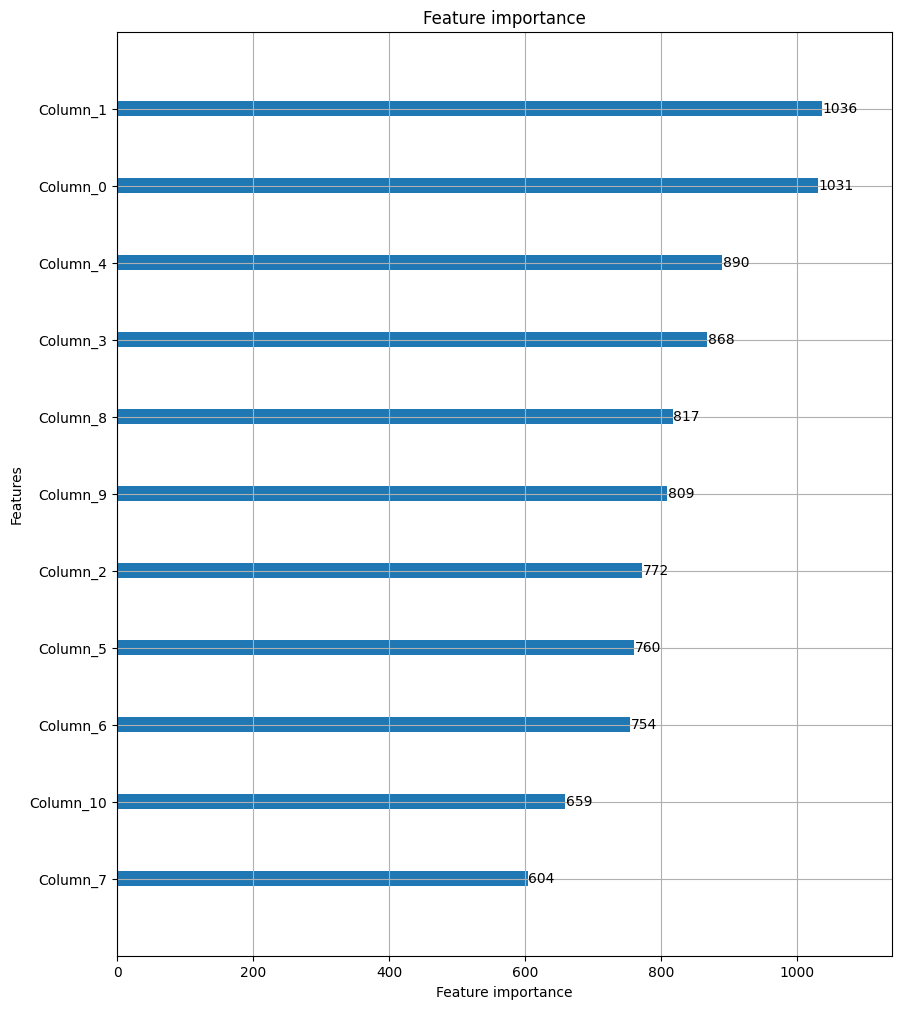

In [ ]:
from lightgbm import plot_importance
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(LGBM, ax=ax)
plt.show

In [ ]:
### Light GBM  + GridSearchCV ###
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score

param_grid = {
    'boosting_type': ['gbdt'],
    'max_depth' : [1, 2, 3, 4, 5],
    'num_leaves' : [3, 4, 5, 6, 7],
    'learning_rate' : [0.03, 0.05, 1.0, 0.2, 0.3],
    'objective' : ['multiclass'],
    'metric' : ['multi_logloss'],
    'colsample_bytree': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
    'subsample' : [0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
    'n_estimators' : [5, 10, 15, 20],
    'num_class' : [1]
}

LGBM = LGBMClassifier()
grid_cv = GridSearchCV(LGBM, param_grid=param_grid, cv=3, scoring='f1_micro', n_jobs=4)
grid_cv.fit(train_input, train_output)

print(grid_cv.best_params_) 
print(grid_cv.best_score_)
train_preds = grid_cv.predict(train_input)
test_preds = grid_cv.predict(test_input)
train_f1 = f1_score(train_output, train_preds, average='micro')
test_f1 = f1_score(test_output, test_preds, average='micro')
# {'boosting_type': 'gbdt', 'colsample_bytree': 0.9, 'learning_rate': 0.03, 'max_depth': 3, 'metric': 'multi_logloss', 'n_estimators': 10, 'num_class': 1, 'num_leaves': 6, 'objective': 'multiclass', 'subsample': 0.5}
print("Train F1 Score:", train_f1) # Train F1 Score: 0.5991665728122536
print("Test F1 Score:", test_f1) # Test F1 Score: 0.7924195680916704

In [ ]:
print(grid_cv.score(train_input, train_output)) # 0.5991665728122536
print(grid_cv.score(test_input, test_output)) # 0.7924195680916704

# XGBoost

In [18]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

XGB = XGBClassifier(n_estimators=100, learning_rate=0.15, max_depth=15, random_state=42, colsample_bytree=0.8, gamma=0)

XGB.fit(train_input, train_output)

train_pred = XGB.predict(train_input)
test_pred = XGB.predict(test_input)
print(accuracy_score(train_pred, train_output))
print(accuracy_score(test_pred, test_output))

1.0
0.8129938542581212


In [19]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# 정확도 계산
accuracy = accuracy_score(test_output, test_pred)
print("Accuracy:", accuracy)

# 정밀도 계산
precision = precision_score(test_output, test_pred, average='macro')
print("Precision:", precision)

# 재현율 계산
recall = recall_score(test_output, test_pred, average='macro')
print("Recall:", recall)

# F1 스코어 계산
f1 = f1_score(test_output, test_pred, average='macro')
print("F1 Score:", f1)

Accuracy: 0.8129938542581212
Precision: 0.8420549170968195
Recall: 0.7504858831366544
F1 Score: 0.7872799913951146


In [ ]:
# import joblib

# joblib.dump(scaler_fit, '/content/drive/MyDrive/빅데이터 팀플/model/xgb_scaler.pkl')

In [ ]:
# import joblib

# joblib.dump(XGB, '/content/drive/MyDrive/빅데이터 팀플/model/xgb_model.pkl')

['/content/drive/MyDrive/빅데이터 팀플/model/xgb_model.pkl']

In [20]:
### XGBoost GridSearchCV ###
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score

xgb= XGBClassifier()

xgb_param_grid={
    'n_estimators' : [100,200,300,400,500],
    'learning_rate' : [0.01,0.05,0.1,0.15],
    'max_depth' : [3,5,7,10,15],
    'gamma' : [0,1,2,3],
    'colsample_bytree' : [0.8,0.9],
    
}

xgb_grid=GridSearchCV(xgb, param_grid = xgb_param_grid, scoring="f1_macro", n_jobs=-1, verbose = 2)
xgb_grid.fit(train_input, train_output)

#best f1_macro 수치와 best parameter확인
print("best f1_macro : {0: .4f}".format(xgb_grid.best_score_))
print("best param : ",xgb_grid.best_params_)

#dataframe으로 랭킹순보기
result_df = pd.DataFrame(xgb_grid.cv_results_)
result_df.sort_values(by=['rank_test_score'],inplace=True)

#plot
result_df[['params','mean_test_score','rank_test_score']].head(10)


Fitting 5 folds for each of 800 candidates, totalling 4000 fits
best f1_macro :  0.7852
best param :  {'colsample_bytree': 0.9, 'gamma': 0, 'learning_rate': 0.15, 'max_depth': 15, 'n_estimators': 500}


,params,mean_test_score,rank_test_score
499,"{'colsample_bytree': 0.9, 'gamma': 0, 'learnin...",0.785166,1
498,"{'colsample_bytree': 0.9, 'gamma': 0, 'learnin...",0.783941,2
468,"{'colsample_bytree': 0.9, 'gamma': 0, 'learnin...",0.783110,3
494,"{'colsample_bytree': 0.9, 'gamma': 0, 'learnin...",0.782861,4
497,"{'colsample_bytree': 0.9, 'gamma': 0, 'learnin...",0.782832,5
469,"{'colsample_bytree': 0.9, 'gamma': 0, 'learnin...",0.782653,6
474,"{'colsample_bytree': 0.9, 'gamma': 0, 'learnin...",0.782488,7
492,"{'colsample_bytree': 0.9, 'gamma': 0, 'learnin...",0.781899,8
493,"{'colsample_bytree': 0.9, 'gamma': 0, 'learnin...",0.781881,9
94,"{'colsample_bytree': 0.8, 'gamma': 0, 'learnin...",0.781742,10


In [21]:
print(xgb_grid.score(train_input, train_output))
print(xgb_grid.score(test_input, test_output)) 


1.0
0.8020239575298093


In [22]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

test_pred = xgb_grid.predict(test_input)

# 정확도 계산
accuracy = accuracy_score(test_output, test_pred)
print("Accuracy:", accuracy)

# 정밀도 계산
precision = precision_score(test_output, test_pred, average='macro')
print("Precision:", precision)

# 재현율 계산
recall = recall_score(test_output, test_pred, average='macro')
print("Recall:", recall)

# F1 스코어 계산
f1 = f1_score(test_output, test_pred, average='macro')
print("F1 Score:", f1)

Accuracy: 0.8244073748902546
Precision: 0.8416233659789031
Recall: 0.7727108795832498
F1 Score: 0.8020239575298093


# RandomForest

In [ ]:
### RandomForestClassifier ### 

from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(random_state=0, n_jobs=-1)

RF.fit(train_input, train_output)

print(RF.score(train_input, train_output))
print(RF.score(test_input, test_output)) # 0.6751873071837814

<ipython-input-19-b80fb5c6257e>:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RF.fit(train_input, train_output)


1.0
0.7848990342405618


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

test_pred = RF.predict(test_input)

# 정확도 계산
accuracy = accuracy_score(test_output, test_pred)
print("Accuracy:", accuracy)

# 정밀도 계산
precision = precision_score(test_output, test_pred, average='macro')
print("Precision:", precision)

# 재현율 계산
recall = recall_score(test_output, test_pred, average='macro')
print("Recall:", recall)

# F1 스코어 계산
f1 = f1_score(test_output, test_pred, average='macro')
print("F1 Score:", f1)

Accuracy: 0.7848990342405618
Precision: 0.8315403139250638
Recall: 0.7098051706747359
F1 Score: 0.7546042797893552


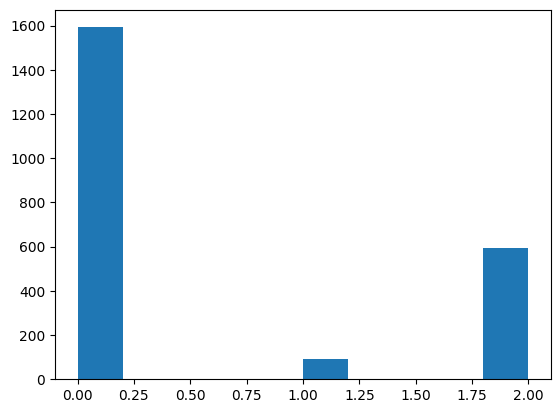

In [ ]:
test_pred = RF.predict(test_input)
plt.hist(test_pred)
plt.show()

In [ ]:
### RandomForest GridSearchCV ### 

from sklearn.model_selection import GridSearchCV

params ={
    'n_estimators':[10, 100],
    'max_depth':[6,8,10,12],
    'min_samples_leaf':[8,12,18],
    'min_samples_split':[8,16,20]
}

RF = RandomForestClassifier(random_state=0, n_jobs=-1)
grid_cv = GridSearchCV(RF, param_grid=params, cv=2, n_jobs=-1)
grid_cv.fit(train_input, train_output)
print(grid_cv.score(train_input, train_output))
print(grid_cv.score(test_input, test_output)) # 0.7236668135742618
print(grid_cv.best_params_) # {'max_depth': 6, 'min_samples_leaf': 8, 'min_samples_split': 8, 'n_estimators': 10}

# KNN

In [ ]:
### KNN ###
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors=3)
KNN.fit(train_input, train_output)

print(KNN.score(train_input, train_output))
print(KNN.score(test_input, test_output))

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.8730245829675154
0.7822651448639157


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

test_pred = KNN.predict(test_input)

# 정확도 계산
accuracy = accuracy_score(test_output, test_pred)
print("Accuracy:", accuracy)

# 정밀도 계산
precision = precision_score(test_output, test_pred, average='macro')
print("Precision:", precision)

# 재현율 계산
recall = recall_score(test_output, test_pred, average='macro')
print("Recall:", recall)

# F1 스코어 계산
f1 = f1_score(test_output, test_pred, average='macro')
print("F1 Score:", f1)

Accuracy: 0.7822651448639157
Precision: 0.7806524723411624
Recall: 0.7314065146323211
F1 Score: 0.7531385038945523


# Naive Bayes

In [ ]:
### Naive Bayes ### 
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

GNB = GaussianNB()

GNB.fit(train_input, train_output)
train_pred = GNB.predict(train_input)
test_pred = GNB.predict(test_input)
print(accuracy_score(train_output, train_pred))
print(accuracy_score(test_output, test_pred))

0.5825285338015803
0.5877963125548727


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

test_pred = GNB.predict(test_input)

# 정확도 계산
accuracy = accuracy_score(test_output, test_pred)
print("Accuracy:", accuracy)

# 정밀도 계산
precision = precision_score(test_output, test_pred, average='macro')
print("Precision:", precision)

# 재현율 계산
recall = recall_score(test_output, test_pred, average='macro')
print("Recall:", recall)

# F1 스코어 계산
f1 = f1_score(test_output, test_pred, average='macro')
print("F1 Score:", f1)

Accuracy: 0.5877963125548727
Precision: 0.46481039050719025
Recall: 0.44401108319761895
F1 Score: 0.43385245538134615


# Extra Trees Classifier|

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score


test_input = scaler_fit.transform(test_input)

xtree = ExtraTreesClassifier(n_estimators=5, random_state=42)
xtree.fit(train_input, train_output)

train_pred = xtree.predict(train_input)
test_pred = xtree.predict(test_input)
print(accuracy_score(train_pred, train_output))
print(accuracy_score(test_pred, test_output))

1.0
0.5992098331870062


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
<ipython-input-26-62a5a9d76433>:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  xtree.fit(train_input, train_output)


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

test_pred = xtree.predict(test_input)

# 정확도 계산
accuracy = accuracy_score(test_output, test_pred)
print("Accuracy:", accuracy)

# 정밀도 계산
precision = precision_score(test_output, test_pred, average='macro')
print("Precision:", precision)

# 재현율 계산
recall = recall_score(test_output, test_pred, average='macro')
print("Recall:", recall)

# F1 스코어 계산
f1 = f1_score(test_output, test_pred, average='macro')
print("F1 Score:", f1)

Accuracy: 0.5992098331870062
Precision: 0.1997366110623354
Recall: 0.3333333333333333
F1 Score: 0.24979412572056


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.tree import ExtraTreeClassifier
### RandomForest GridSearchCV ### 

from sklearn.model_selection import GridSearchCV

params ={'max_leaf_nodes': list(range(2, 100)), 'min_samples_split': [2, 3, 4]}

xtree = ExtraTreeClassifier(random_state=42)
grid_cv = GridSearchCV(xtree, param_grid=params, cv=2)
grid_cv.fit(train_input, train_output)
print(grid_cv.score(train_input, train_output))
print(grid_cv.score(test_input, test_output)) # 0.7236668135742618
print(grid_cv.best_params_) # {'max_depth': 6, 'min_samples_leaf': 8, 'min_samples_split': 8, 'n_estimators': 10}